In [1]:
import json
import random
import sys
from typing import Dict, List

import numpy as np
from matplotlib import pyplot as plt

sys.path.insert(1, '../../src')

from ce.algorithms.greedy_heuristics import random_solution
from ce.algorithms.local_search import greedy_local_search, two_edges_neighborhood
from ce.algorithms.global_convexity.similarity import calculate_avg_similarity, calculate_similarities, edge_similarity, node_similarity
from ce.tsp import create_tsp, TSP
from ce.utils.experiments import experiment, quality_plots
from scipy.stats import pearsonr

# Global convexity (fitness-distance/similarity correlations)

**Nina Zukowska 148278, Antoni Solarski 148270**

In [2]:
problem_instance_A_path = '../../data/TSPA.csv'
problem_instance_B_path = '../../data/TSPB.csv'
problem_instance_C_path = '../../data/TSPC.csv'
problem_instance_D_path = '../../data/TSPD.csv'

In [3]:
tspa = create_tsp(problem_instance_A_path)
tspb = create_tsp(problem_instance_B_path)
tspc = create_tsp(problem_instance_C_path)
tspd = create_tsp(problem_instance_D_path)

## Algorithms

---

Node similarity - number of common nodes in solutions.

```python
def node_similarity(solution1: List[int], solution2: List[int]) -> float:
    common_nodes = set(solution1).intersection(set(solution2))
    return len(common_nodes) / len(solution1)
```

Edge similarity - number of common edges in solutions.

```python
def edge_similarity(solution1: List[int], solution2: List[int]) -> float:
    common_edges = _get_edges(solution1).intersection(_get_edges(solution2))
    return len(common_edges) / 2 / len(solution1)
```

---

Functions to calculate: 
- similarities between the given solution and the list of other solutions
- avg similarity of the given solution to the list of other solutions

```python
def calculate_similarities(solution: List[int], other_solutions: List[List[int]], similarity_fn) -> List[float]:
    return [similarity_fn(solution, x) for x in other_solutions]
```

```python
def calculate_avg_similarity(solution: List[int], other_solutions: List[List[int]], similarity_fn) -> float:
    similarities = calculate_similarities(solution, other_solutions, similarity_fn)
    return sum(similarities) / len(similarities)
```

---

## Experiments

In [4]:
def generate_solutions(tsp: TSP, n_solutions: int) -> List[List[int]]:
    return [
        greedy_local_search(tsp, random_solution(tsp), two_edges_neighborhood)[0]
        for _ in range(n_solutions)
    ]

In [5]:
def get_costs(tsp: TSP, solutions: List[List[int]]) -> List[int]:
    return [tsp.get_solution_cost(s) for s in solutions]

In [6]:
def get_to_best_similarities(best_solution: List[int], solutions: List[List[int]]) -> Dict[str, List[float]]:
    return {
        "nodes": calculate_similarities(best_solution, solutions, node_similarity),
        "edges": calculate_similarities(best_solution, solutions, edge_similarity),
    }

In [7]:
def get_avg_similarities(solutions: List[List[int]]) -> Dict[str, List[float]]:
    return {
        "nodes": [calculate_avg_similarity(s, solutions, node_similarity) for s in solutions],
        "edges": [calculate_avg_similarity(s, solutions, edge_similarity) for s in solutions],
    }

In [8]:
def plot(costs: List[int], similarities: Dict[str, List[float]]):
    num_plots = len(similarities)
    fig, axs = plt.subplots(1, len(similarities), figsize=(8 * num_plots, 8))

    for i, (t, s) in enumerate(similarities.items()):
        axs[i].title.set_text(t)
        axs[i].scatter(costs, s)
        correlation_coefficient, p_value = pearsonr(costs, s)
        print(f"Correlation for {t}")
        print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
        print(f"P-value: {p_value}")
        print(f"Correlation present? {p_value < 0.05}")

    plt.show()

In [9]:
n_solutions = 1000

---

### Instance C

In [10]:
with open('../report_7/best_solutions_c.json', 'r', encoding='utf-8') as f:
    c_best_solution = json.load(f)[1]

tspc.get_solution_cost(c_best_solution)

47259.0

In [13]:
%%time
random.seed(13)
np.random.seed(13)

c_solutions = generate_solutions(tspc, n_solutions)

CPU times: total: 29min 13s
Wall time: 29min 11s


In [14]:
c_costs = get_costs(tspc, c_solutions)
min(c_costs), sum(c_costs) / len(c_costs), max(c_costs)

(49290.0, 51567.266, 55089.0)

In [15]:
c_to_best_similarities = get_to_best_similarities(c_best_solution, c_solutions)
c_avg_similarities = get_avg_similarities(c_solutions)

---

##### Similarities to the best solution

Correlation for nodes
Pearson Correlation Coefficient: -0.5471639460566796
P-value: 3.600207785905184e-79
Correlation present? True
Correlation for edges
Pearson Correlation Coefficient: -0.4937814477469505
P-value: 1.384614439851377e-62
Correlation present? True


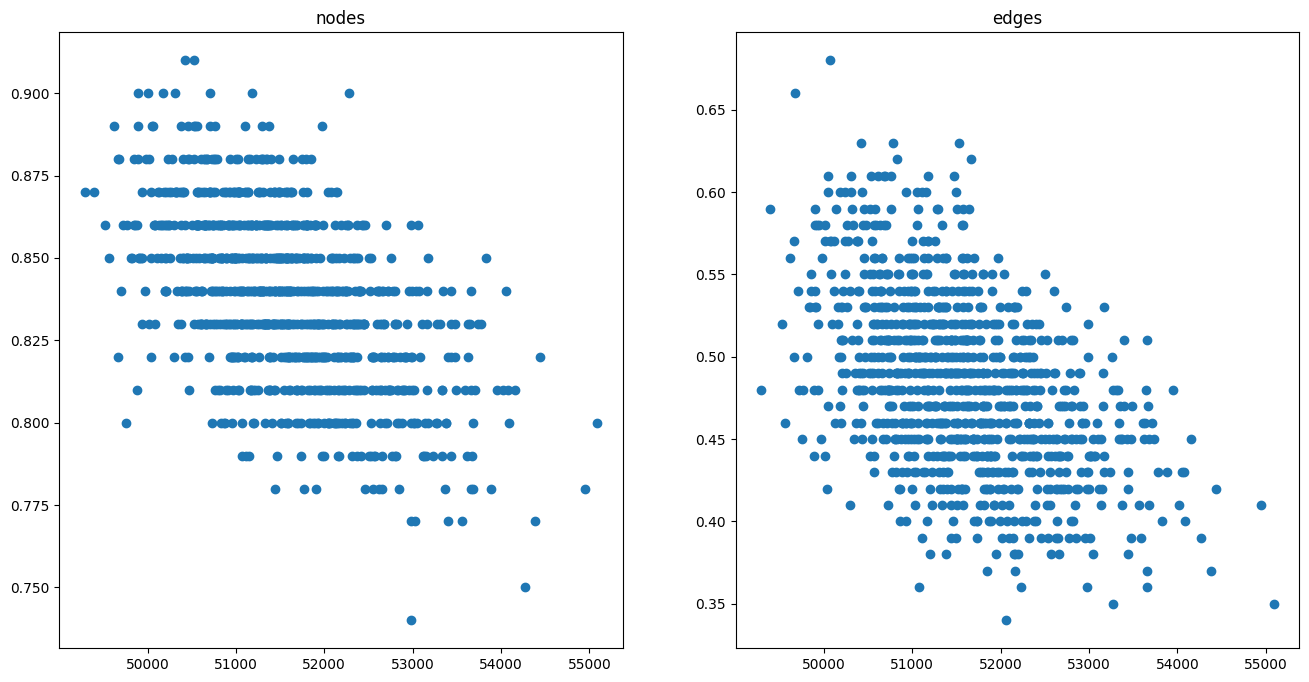

In [16]:
plot(c_costs, c_to_best_similarities)

---

##### Average Similarities to other solutions

Correlation for nodes
Pearson Correlation Coefficient: -0.5089029538706924
P-value: 5.481303326738493e-67
Correlation present? True
Correlation for edges
Pearson Correlation Coefficient: -0.6735882833127991
P-value: 3.492359303718246e-133
Correlation present? True


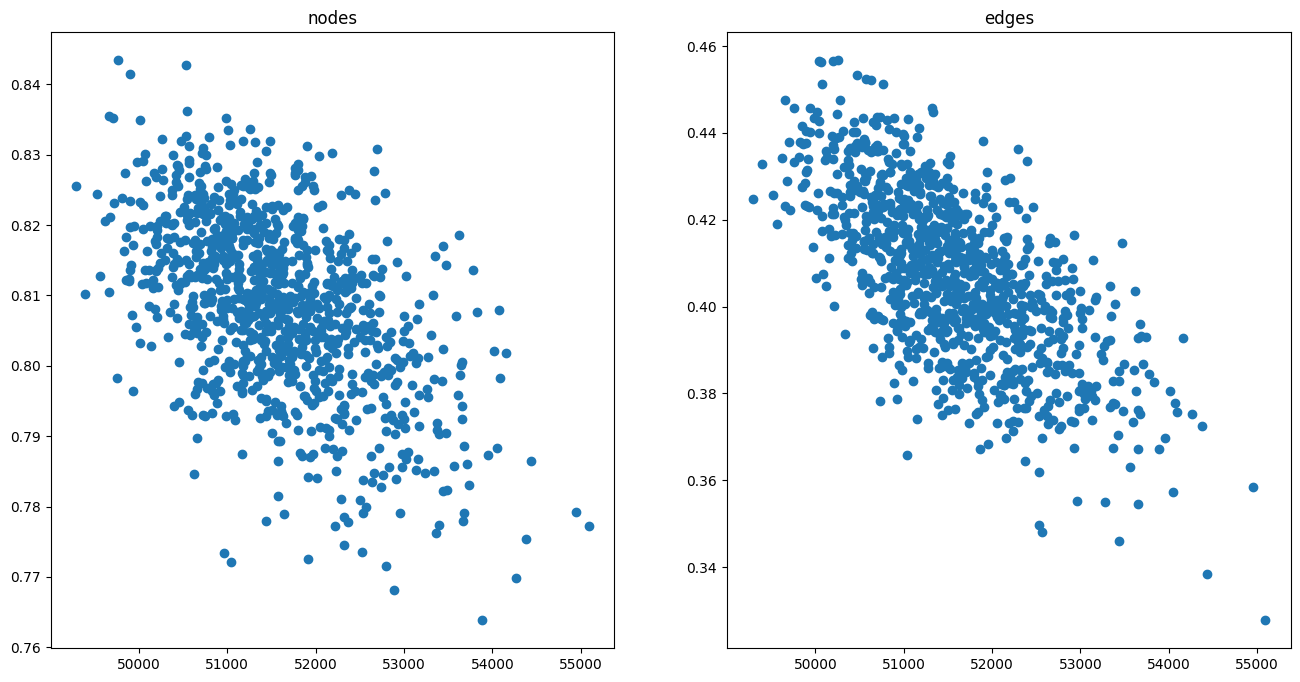

In [17]:
plot(c_costs, c_avg_similarities)

---

In [18]:
with open('c_costs.json', 'w', encoding='utf-8') as f:
    json.dump(c_costs, f, ensure_ascii=False, indent=4)
with open('c_to_best_similarities.json', 'w', encoding='utf-8') as f:
    json.dump(c_to_best_similarities, f, ensure_ascii=False, indent=4)
with open('c_avg_similarities.json', 'w', encoding='utf-8') as f:
    json.dump(c_avg_similarities, f, ensure_ascii=False, indent=4)

---

### Instance D

In [20]:
with open('../report_7/best_solutions_d.json', 'r', encoding='utf-8') as f:
    d_best_solution = json.load(f)[1]

tspd.get_solution_cost(d_best_solution)

44153.0

In [21]:
%%time
random.seed(13)
np.random.seed(13)

d_solutions = generate_solutions(tspd, n_solutions)

CPU times: total: 30min 8s
Wall time: 30min 8s


In [22]:
d_costs = get_costs(tspd, d_solutions)
min(d_costs), sum(d_costs) / len(d_costs), max(d_costs)

(44848.0, 48517.927, 53047.0)

In [23]:
d_to_best_similarities = get_to_best_similarities(d_best_solution, d_solutions)
d_avg_similarities = get_avg_similarities(d_solutions)

---

##### Similarities to the best solution

Correlation for nodes
Pearson Correlation Coefficient: -0.472050103058894
P-value: 1.2413995685702468e-56
Correlation present? True
Correlation for edges
Pearson Correlation Coefficient: -0.48194968418168754
P-value: 2.7248071139534586e-59
Correlation present? True


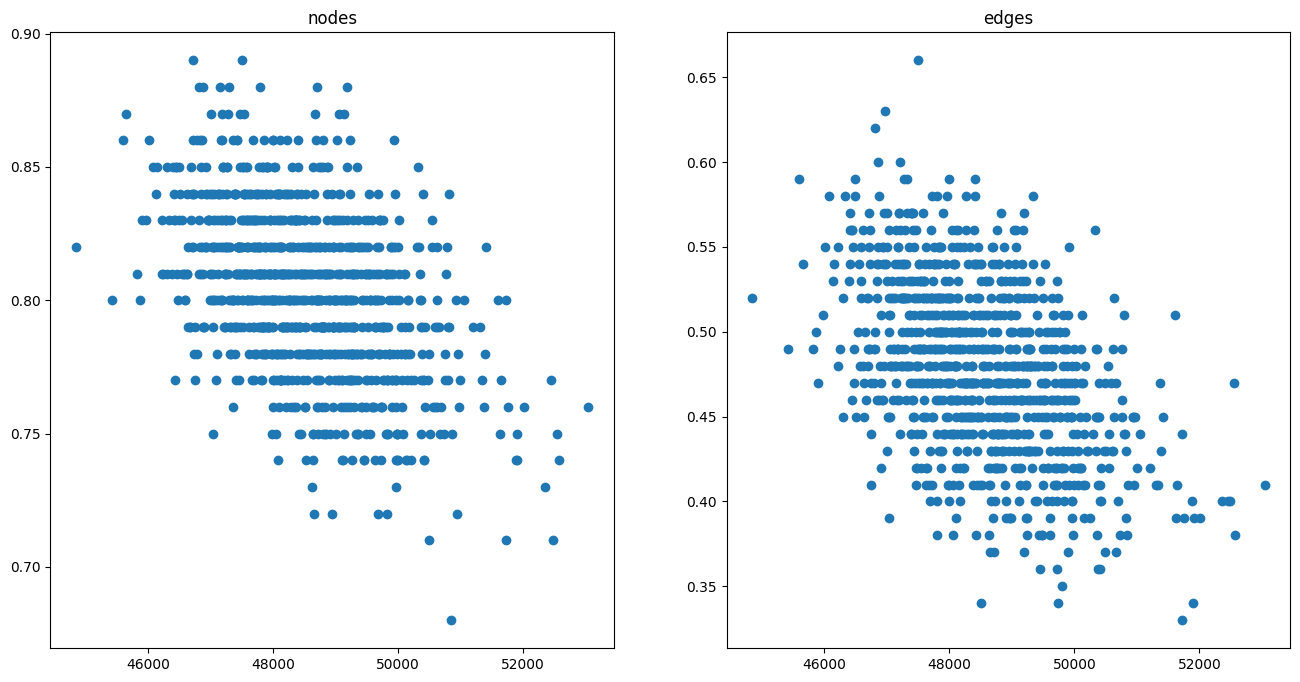

In [24]:
plot(d_costs, d_to_best_similarities)

---

##### Average Similarities to other solutions

Correlation for nodes
Pearson Correlation Coefficient: -0.5237162911745126
P-value: 1.6075975393181384e-71
Correlation present? True
Correlation for edges
Pearson Correlation Coefficient: -0.7139066358774392
P-value: 1.2740463293617553e-156
Correlation present? True


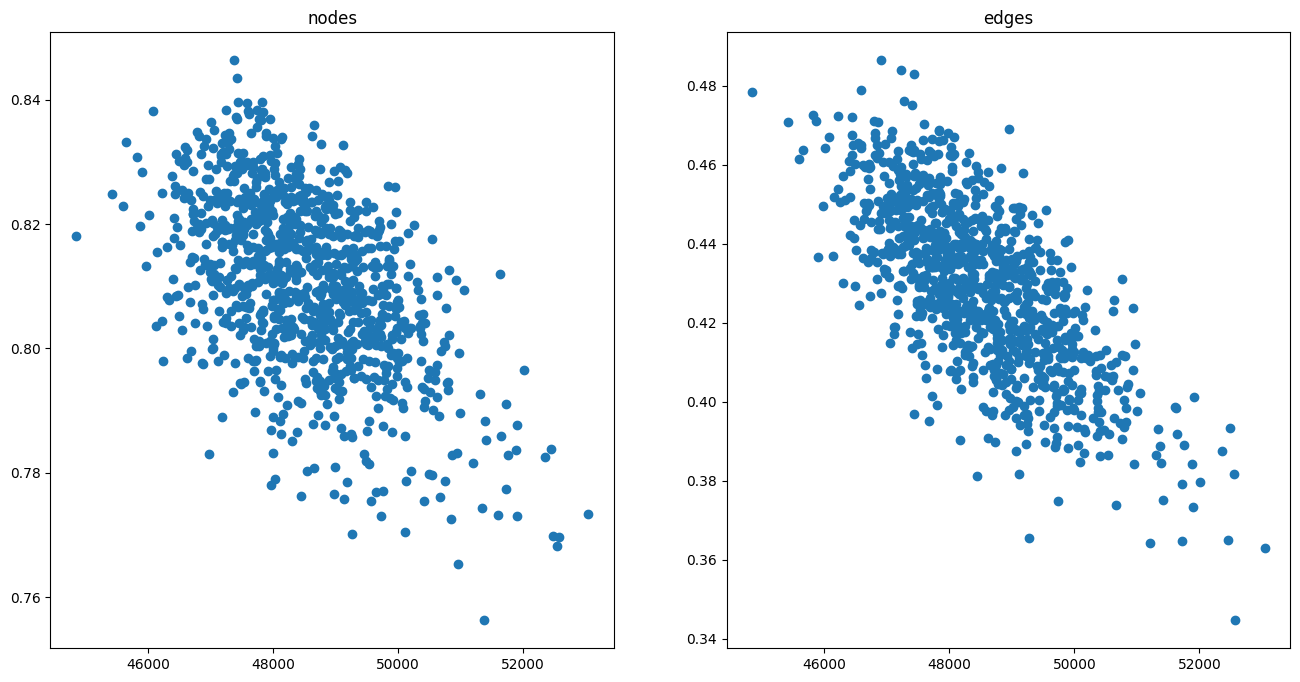

In [25]:
plot(d_costs, d_avg_similarities)

---

In [26]:
with open('d_costs.json', 'w', encoding='utf-8') as f:
    json.dump(d_costs, f, ensure_ascii=False, indent=4)
with open('d_to_best_similarities.json', 'w', encoding='utf-8') as f:
    json.dump(d_to_best_similarities, f, ensure_ascii=False, indent=4)
with open('d_avg_similarities.json', 'w', encoding='utf-8') as f:
    json.dump(d_avg_similarities, f, ensure_ascii=False, indent=4)

---

## Conclusions

The best solutions from the 7th report were used as benchmark solutions for calculating the similarities.  
In all experiments, the correlation between the similarity was confirmed to be significant.

Results were expected as particular nodes or edges can be considered "good" and should always be a part of a "good" solution.